Goal: to import google takeout data of youtube watch history to gain insights

Data: https://takeout.google.com <br>
Document: jupyter notebook <br>
Import: python <br>
Dataframe: pandas, numpy <br>
Visualize: matplotlib <br>

Follow an example of youtube data analysis:
https://jovian.ai/lucafrance/learning-from-my-youtube-watch-history

Import google data as pandas dataframe

In [2]:

import json
import pandas as pd
with open('./google-takeout/YouTube and YouTube Music/history/watch-history.json', 'r') as f:
    data = json.load(f)
df = pd.DataFrame(data)


Display dataframe as table

In [3]:
df

,header,title,titleUrl,subtitles,time,products,activityControls,description,details
0,YouTube,"Watched Brute Showdown Episode 3: Deadlift, Ph...",https://www.youtube.com/watch?v=FJ5Sxlhn-3I,"[{'name': 'Brute Strength', 'url': 'https://ww...",2022-06-09T00:28:32.650Z,[YouTube],[YouTube watch history],NaN,NaN
1,YouTube,Watched Disney+ | The Book of Boba Fett,https://www.youtube.com/watch?v=yUDTNEqd5Zk,NaN,2022-06-09T00:28:16.307Z,[YouTube],"[Web & App Activity, YouTube watch history, Yo...",Watched at 7:28pm,[{'name': 'From Google Ads'}]
2,YouTube,Watched Why we’re leaving California.,https://www.youtube.com/watch?v=E9se1YqCRaA,"[{'name': 'Matt D'Avella', 'url': 'https://www...",2022-06-09T00:27:38.615Z,[YouTube],[YouTube watch history],NaN,NaN
3,YouTube,Watched Best of Kiasmos,https://www.youtube.com/watch?v=F1gIsoIVQG8,"[{'name': 'Cure Music', 'url': 'https://www.yo...",2022-06-09T00:25:09.401Z,[YouTube],[YouTube watch history],NaN,NaN
4,YouTube,Watched Vrbo | A Place Together | 30s | Combo,https://www.youtube.com/watch?v=lPxEdelzWvI,NaN,2022-06-09T00:25:02.652Z,[YouTube],"[Web & App Activity, YouTube watch history, Yo...",Watched at 7:25pm,[{'name': 'From Google Ads'}]
...,...,...,...,...,...,...,...,...,...
36561,YouTube,"Watched EPIC WORKOUT | Bradley Martyn, Phil He...",https://www.youtube.com/watch?v=rVKs3TmaF1Y,"[{'name': 'Bradley Martyn', 'url': 'https://ww...",2018-01-16T18:39:19.530Z,[YouTube],[YouTube watch history],NaN,NaN
36562,YouTube,Watched Sk Yivx: WTF Is A Yivx? | Ep. 4,https://www.youtube.com/watch?v=KM8Rybo3xQQ,"[{'name': 'The Skwad', 'url': 'https://www.you...",2018-01-08T19:46:14.669Z,[YouTube],[YouTube watch history],NaN,NaN
36563,YouTube,Watched New Kids On The Block | A Call Of Duty...,https://www.youtube.com/watch?v=NU1hRIxgQlY,"[{'name': 'The Skwad', 'url': 'https://www.you...",2018-01-08T19:45:32.787Z,[YouTube],[YouTube watch history],NaN,NaN
36564,YouTube,Watched [SOLVED] - The File Or Directory Is Co...,https://www.youtube.com/watch?v=Ix13LRGmzk8,"[{'name': 'MrJayBusch', 'url': 'https://www.yo...",2017-12-30T05:24:50.736Z,[YouTube],[YouTube watch history],NaN,NaN


Get dataframe column types

In [4]:
df.dtypes

header              object
title               object
titleUrl            object
subtitles           object
time                object
products            object
activityControls    object
description         object
details             object
dtype: object

Convert time column to datetime type

In [5]:

# copy time to date column as a datetime
df["date"] = pd.to_datetime(df["time"])

#convert from UTC to Local Time zone
import datetime
LOCAL_TIMEZONE = datetime.datetime.now(datetime.timezone.utc).astimezone().tzinfo

df["date"] = df["date"].dt.tz_convert(LOCAL_TIMEZONE)

df["date"]


0       2022-06-08 19:28:32.650000-05:00
1       2022-06-08 19:28:16.307000-05:00
2       2022-06-08 19:27:38.615000-05:00
3       2022-06-08 19:25:09.401000-05:00
4       2022-06-08 19:25:02.652000-05:00
                      ...               
36561   2018-01-16 13:39:19.530000-05:00
36562   2018-01-08 14:46:14.669000-05:00
36563   2018-01-08 14:45:32.787000-05:00
36564   2017-12-30 00:24:50.736000-05:00
36565   2017-12-30 00:23:55.390000-05:00
Name: date, Length: 36566, dtype: datetime64[ns, CDT]

Run some statistics over the dataframe

In [6]:
videos_count = len(df)

max_time = df["date"].max()
min_time = df["date"].min()
print("The dataset includes videos from {} to {}.".format(min_time.strftime("%m/%d/%Y"), max_time.strftime("%m/%d/%Y")))

days_count = max_time - min_time
days_count = days_count.days
avg_views = videos_count / days_count
print("I watched {} videos over {} days. That's an average of {:.1f} per day.".format(videos_count, days_count, avg_views))




The dataset includes videos from 12/30/2017 to 06/08/2022.
I watched 36566 videos over 1621 days. That's an average of 22.6 per day.


Heatmap of videos watched per day of the week per hour

<AxesSubplot: xlabel='hour', ylabel='weekday'>

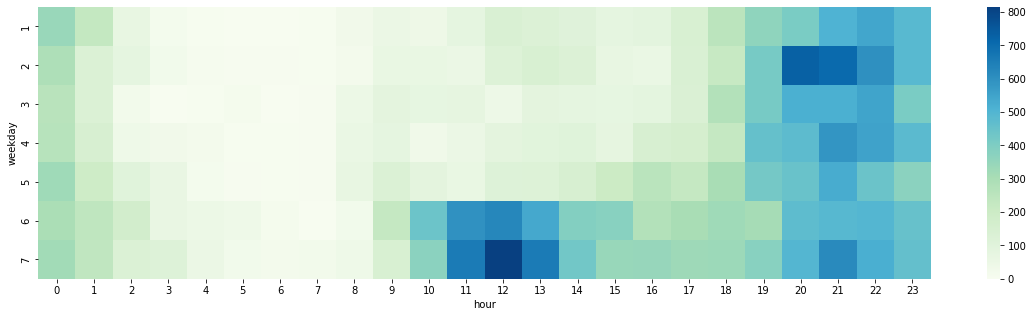

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df["weekday"] = [timestamp.isoweekday() for timestamp in df["date"]]
df["hour"] = [timestamp.hour for timestamp in df["date"]]
df["ones"] = np.ones(len(df))

views = df.pivot_table(index="weekday", columns="hour", values="ones", aggfunc=np.sum, fill_value=0)

plt.figure(figsize = (20, 5))
sns.heatmap(views, annot=False, cmap="GnBu") #Green and Blue

Line chart of videos watched over time 

<AxesSubplot: >

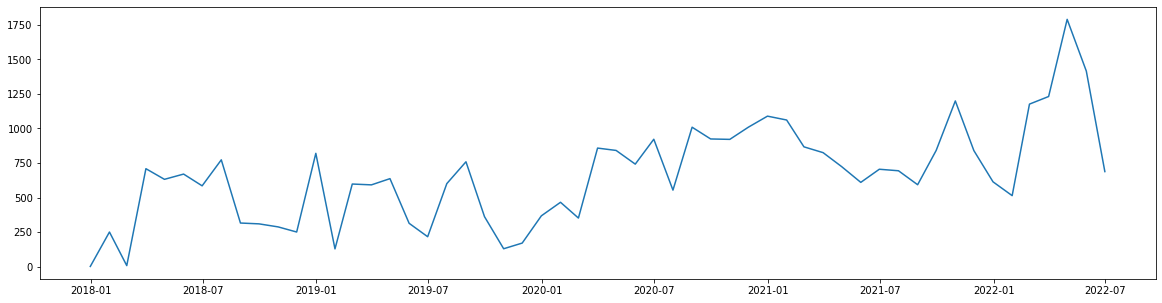

In [13]:

from pandas.tseries.offsets import *

df["day"] = pd.to_datetime(df['date']).dt.date

df['week ending'] = df['date'] + Week(weekday=4)
df["week ending day"] = pd.to_datetime(df['week ending']).dt.date

df['month ending'] = pd.to_datetime(df['date']) + MonthEnd(1)
df["month ending day"] = pd.to_datetime(df['month ending']).dt.date

# s = df['day'].value_counts().sort_index()
# s.plot(figsize=(20,5))

# s2 = df['week ending day'].value_counts().sort_index()
# s2.plot(figsize=(20,5))

s3 = df['month ending day'].value_counts().sort_index()
s3.plot(figsize=(20,5))
